# GenericSwingGraphics (GSG) Easy-Mode Test
We are not using XCharts here, but a custom-written Java Swing module...
The module is named `Algebra`, found in the [`raspberry-coffee` project repository](https://github.com/OlivierLD/raspberry-coffee).

In [1]:
/* 
 * This jar is compiled from the Algebra module, in the raspberry-coffee repo,
 * available at https://github.com/OlivierLD/raspberry-coffee
 *
 * ../gradlew build
 * cp build/libs/Algebra-1.0-all.jar .
 */
%classpath add jar "../Algebra-1.0-all.jar"

In [2]:
import gsg.SwingUtils.*;
import gsg.VectorUtils;
import static gsg.VectorUtils.Vector2D;

import javax.swing.*;
import java.awt.*;

import java.util.List;
import java.util.stream.Collectors;
import java.util.function.Consumer;
import java.util.function.Function;


In [3]:
// Environment
String.format("Running from folder %s", System.getProperty("user.dir"));

Running from folder /Users/olivierlediouris/repos/MathForProgrammersForked/Chapter 02

In [4]:
// Environment
String.format("Java version %s", System.getProperty("java.version"));

Java version 11.0.8

### Create the WhiteBoard
See in the cells below, how we mostly focus on the data.

The rendering is taken care of by the `WhiteBoardPanel`. All we need to call to display it is `whiteBoard.getImage();`

In [5]:
WhiteBoardPanel whiteBoard = new WhiteBoardPanel();
// Override defaults (not mandatory)
whiteBoard.setAxisColor(new Color(125, 0, 255, 255));
whiteBoard.setWithGrid(true);
whiteBoard.setBgColor(new Color(250, 250, 250, 255));
whiteBoard.setGraphicTitle("121 Dinos");
whiteBoard.setDimension(new Dimension(800, 590));
whiteBoard.setTextColor(Color.RED);
whiteBoard.setTitleFont(new Font("Arial", Font.BOLD | Font.ITALIC, 48));
whiteBoard.setGraphicMargins(30);

### Now, the data

In [6]:
List<Vector2D> dinoVectors = Arrays.asList( // A dinosaure
                new Vector2D(6, 4),
                new Vector2D(3, 1),
                new Vector2D(1, 2),
                new Vector2D(-1, 5),
                new Vector2D(-2, 5),
                new Vector2D(-3, 4),
                new Vector2D(-4, 4),
                new Vector2D(-5, 3),
                new Vector2D(-5, 2),
                new Vector2D(-2, 2),
                new Vector2D(-5, 1),
                new Vector2D(-4, 0),
                new Vector2D(-2, 1),
                new Vector2D(-1, 0),
                new Vector2D(0, -3),
                new Vector2D(-1, -4),
                new Vector2D(1, -4),
                new Vector2D(2, -3),
                new Vector2D(1, -2),
                new Vector2D(3, -1),
                new Vector2D(5, 1));

### A First display
Scaled and translated several times, 121 dinosaures!

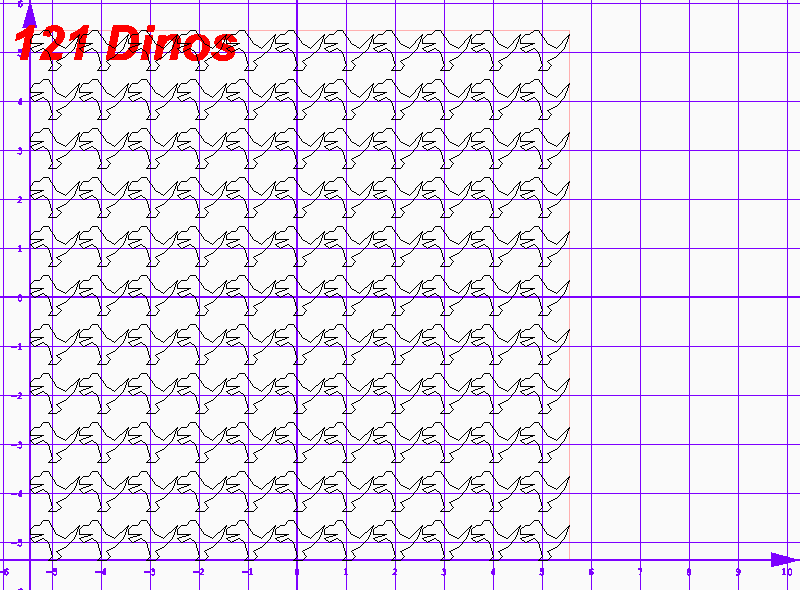

In [7]:
double scale = 0.09;
List<Vector2D> scaled = dinoVectors.stream().map(v -> VectorUtils.scale(scale, v)).collect(Collectors.toList());
for (int x=-5; x<=5; x++) {
    for (int y=-5; y<=5; y++) {
        Vector2D translation = new Vector2D(x, y);
        List<Vector2D> oneSmallDino = scaled.stream().map(v -> VectorUtils.translate(translation, v)).collect(Collectors.toList());
        WhiteBoardPanel.DataSerie serie100 = new WhiteBoardPanel.DataSerie()
                .data(oneSmallDino)
                .graphicType(WhiteBoardPanel.GraphicType.CLOSED_LINE)
                .lineThickness(1)
                .color(Color.BLACK);
        whiteBoard.addSerie(serie100);
    }
}
// Display here
whiteBoard.getImage();

### Another display, on the same white board

In [8]:
whiteBoard.setGraphicTitle("A full test");
whiteBoard.resetAllData();

In [9]:
// Dino, raw, scale 1
WhiteBoardPanel.DataSerie serieOne = new WhiteBoardPanel.DataSerie()
        .data(dinoVectors)
        .graphicType(WhiteBoardPanel.GraphicType.CLOSED_LINE_WITH_DOTS)
        .circleDiam(8)
        .lineThickness(2)
        .color(Color.BLUE);
whiteBoard.addSerie(serieOne);

// Dino, rotated
double rotation = -30d;
List<Vector2D> rotated = dinoVectors.stream().map(v -> VectorUtils.rotate(Math.toRadians(rotation), v)).collect(Collectors.toList());
WhiteBoardPanel.DataSerie serieTwo = new WhiteBoardPanel.DataSerie()
        .data(rotated)
        .graphicType(WhiteBoardPanel.GraphicType.CLOSED_LINE)
        .circleDiam(2)
        .lineThickness(3)
        .color(Color.RED);
whiteBoard.addSerie(serieTwo);

// Dino, scaled
double scale = 0.25;
List<Vector2D> scaled = dinoVectors.stream().map(v -> VectorUtils.scale(scale, v)).collect(Collectors.toList());
WhiteBoardPanel.DataSerie serieThree = new WhiteBoardPanel.DataSerie()
        .data(scaled)
        .graphicType(WhiteBoardPanel.GraphicType.CLOSED_LINE)
        .circleDiam(2)
        .lineThickness(3)
        .color(Color.GREEN);
whiteBoard.addSerie(serieThree);

// Dino, scaled & translated
Vector2D translation = new Vector2D(3, 2);
List<Vector2D> translated = scaled.stream().map(v -> VectorUtils.translate(translation, v)).collect(Collectors.toList());
WhiteBoardPanel.DataSerie serieThreeBis = new WhiteBoardPanel.DataSerie()
        .data(translated)
        .graphicType(WhiteBoardPanel.GraphicType.CLOSED_LINE)
        .circleDiam(2)
        .lineThickness(3)
        .color(Color.GREEN);
whiteBoard.addSerie(serieThreeBis);

// A Polynomial function
List<Vector2D> polynom = new ArrayList<>();
for (double i = -6; i <= 15; i += 0.25) {
    polynom.add(new Vector2D(i,
            (0.01 * Math.pow(i, 3)) - (0.1 * Math.pow(i, 2)) - (0.2 * i) + 3));
}
WhiteBoardPanel.DataSerie serieFour = new WhiteBoardPanel.DataSerie()
        .data(polynom)
        .graphicType(WhiteBoardPanel.GraphicType.LINE)
        .circleDiam(2)
        .lineThickness(3)
        .color(Color.BLUE);
whiteBoard.addSerie(serieFour);

// Cloud of points
List<Vector2D> cloud = new ArrayList<>();
for (int i = 0; i < 200; i++) {
    // x & y in [-10, 10[
    cloud.add(new Vector2D((Math.random() * 20) - 10,
            (Math.random() * 20) - 10));
}
WhiteBoardPanel.DataSerie serieFive = new WhiteBoardPanel.DataSerie()
        .data(cloud)
        .graphicType(WhiteBoardPanel.GraphicType.POINTS)
        .circleDiam(18)
        .color(new Color(255, 0, 0, 126));
whiteBoard.addSerie(serieFive);

Final display

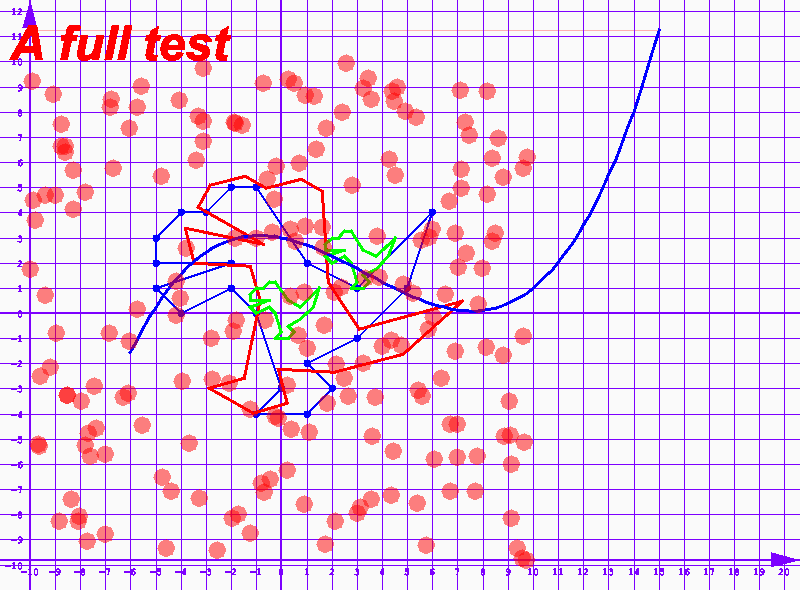

In [10]:
whiteBoard.getImage(); // This is for a Notebook

There you go!

In [11]:
whiteBoard.setGraphicTitle("A trigonometric flower");
whiteBoard.resetAllData();

In [12]:
List<Vector2D> rose = new ArrayList<>();
for (int x=0; x<1_000; x++) {
    // Also try with sin or cos, and change the values (250, 500, 50, etc...) 
    rose.add(new Vector2D(Math.cos(5 * x * Math.PI / 250.0), 2 * Math.PI * x / 1_000.0)); 
}
List<Vector2D> cartesianRose = rose.stream().map(v -> VectorUtils.toCartesian(v)).collect(Collectors.toList());

In [13]:
WhiteBoardPanel.DataSerie serieRose = new WhiteBoardPanel.DataSerie()
        .data(cartesianRose)
        .graphicType(WhiteBoardPanel.GraphicType.LINE)
        .lineThickness(3)
        .color(Color.GREEN);
whiteBoard.addSerie(serieRose);

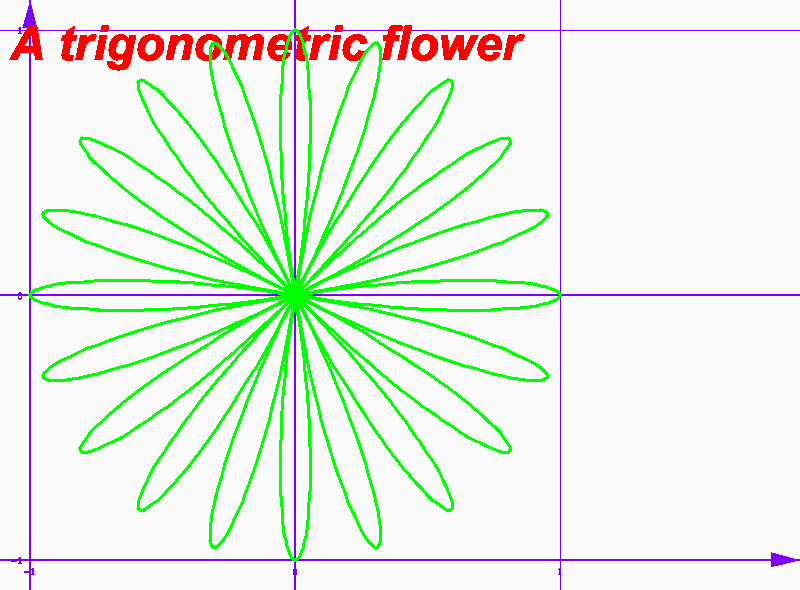

In [14]:
whiteBoard.getImage(); // This is for a Notebook

## Bonus: 3D visualization

In [15]:
Box3D box3D = new Box3D();

In [16]:
box3D.setyMax(5d);
box3D.setZoom(0.75d);

// Do something specific here, after the box drawing.
Consumer<Graphics2D> afterDrawer = g2d -> {
    // Draw a Pyramid
    // 1 - Define its vertex
    VectorUtils.Vector3D topV3 = new VectorUtils.Vector3D(1, -0.5, 2);
    VectorUtils.Vector3D bottomLeftV3 = new VectorUtils.Vector3D(-2, 2, -2);
    VectorUtils.Vector3D bottomRightV3 = new VectorUtils.Vector3D(2, 2.3, -2.1);
    VectorUtils.Vector3D bottomBackV3 = new VectorUtils.Vector3D(2, -2, -2.0);
    // Rotate them
    VectorUtils.Vector3D rotatedTop = VectorUtils.rotate(topV3,
            Math.toRadians(box3D.getRotOnX()),
            Math.toRadians(box3D.getRotOnY()),
            Math.toRadians(box3D.getRotOnZ()));
    VectorUtils.Vector3D rotatedLeft = VectorUtils.rotate(bottomLeftV3,
            Math.toRadians(box3D.getRotOnX()),
            Math.toRadians(box3D.getRotOnY()),
            Math.toRadians(box3D.getRotOnZ()));
    VectorUtils.Vector3D rotatedRight = VectorUtils.rotate(bottomRightV3,
            Math.toRadians(box3D.getRotOnX()),
            Math.toRadians(box3D.getRotOnY()),
            Math.toRadians(box3D.getRotOnZ()));
    VectorUtils.Vector3D rotatedBack = VectorUtils.rotate(bottomBackV3,
            Math.toRadians(box3D.getRotOnX()),
            Math.toRadians(box3D.getRotOnY()),
            Math.toRadians(box3D.getRotOnZ()));
    // Plot!
    Function<VectorUtils.Vector3D, Point> transformer = box3D.getTransformer();
    Point topPoint = transformer.apply(rotatedTop);
    Point leftPoint = transformer.apply(rotatedLeft);
    Point rightPoint = transformer.apply(rotatedRight);
    Point backPoint = transformer.apply(rotatedBack);

    Color facesColor = new Color(0, 255, 0, 60);
    g2d.setStroke(new BasicStroke(1));
    g2d.setColor(facesColor);
    Polygon triangle1 = new Polygon(new int[] {topPoint.x, leftPoint.x, rightPoint.x},
            new int[] {topPoint.y, leftPoint.y, rightPoint.y},
            3);
    g2d.fillPolygon(triangle1);
    g2d.setColor(Color.BLACK);
    g2d.drawPolygon(triangle1);

    g2d.setColor(facesColor);
    Polygon triangle2 = new Polygon(new int[] {topPoint.x, leftPoint.x, backPoint.x},
            new int[] {topPoint.y, leftPoint.y, backPoint.y},
            3);
    g2d.fillPolygon(triangle2);
    g2d.setColor(Color.BLACK);
    g2d.drawPolygon(triangle2);

    g2d.setColor(facesColor);
    Polygon triangle3 = new Polygon(new int[] {topPoint.x, rightPoint.x, backPoint.x},
            new int[] {topPoint.y, rightPoint.y, backPoint.y},
            3);
    g2d.fillPolygon(triangle3);
    g2d.setColor(Color.BLACK);
    g2d.drawPolygon(triangle3);

    g2d.setColor(facesColor);
    Polygon triangle4 = new Polygon(new int[] {leftPoint.x, rightPoint.x, backPoint.x},
            new int[] {leftPoint.y, rightPoint.y, backPoint.y},
            3);
    g2d.fillPolygon(triangle4);
    g2d.setColor(Color.BLACK);
    g2d.drawPolygon(triangle4);
};
box3D.setAfterDrawer(afterDrawer);

Display it!

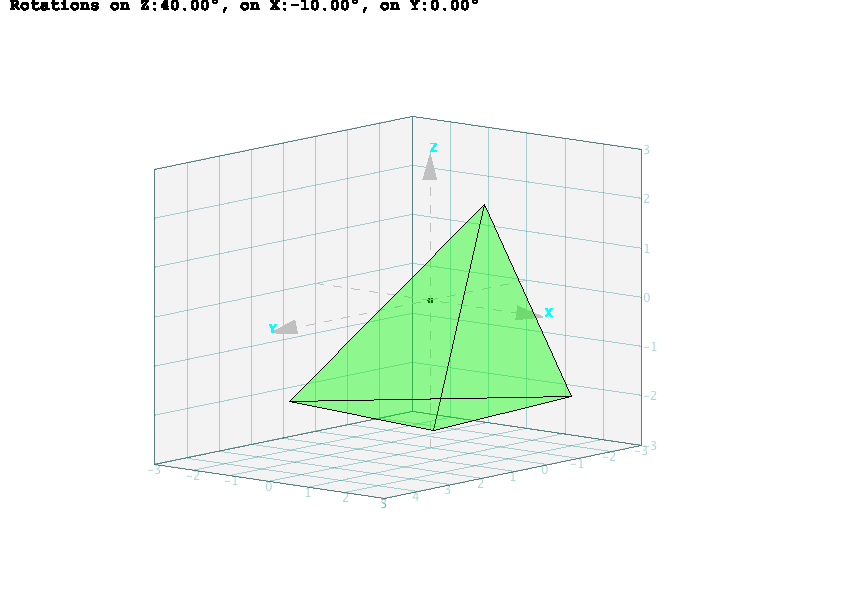

In [17]:
box3D.getImage();